In [24]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as datetime
from datetime import datetime as dt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

# Load files

In [25]:
df_stats = pd.read_csv('../../Dataset/Dataset_clean/stats_UtoD.csv')
df_value = pd.read_csv('../../Dataset/value.csv')
df_pred = pd.read_csv('../../Dataset/Dataset_clean/stats_pred.csv')
df_stats = df_stats.drop (['Unnamed: 0'], axis = 1)

# To keep only the date without the hours and minutes
df_stats['Date'] = pd.to_datetime(df_stats['Date']) 
df_stats['Date'] = df_stats['Date'].dt.date
# Convert the date to Ordinal
df_stats['Date'] = df_stats['Date'].map(dt.toordinal)

# Drop company 'VRSN' due to limited data
df_stats = df_stats[df_stats.Ticker != 'VRSN']
df_stats


,Date,Ticker,Price,DE_Ratio,Trailing_P/E,Price/Sales,Price/Book,Profit_Margin,Operating_Margin,Return_on_Assets,...,Diluted_EPS,Earnings_Growth,Revenue_Growth,Total_Cash,Total_Cash_Per_Share,Total_Debt,Current_Ratio,Book_Value_Per_Share,Cash_Flow,Beta
0,731556,AAPL,1.4306,0.072,112.70,1.25,1.84,1.10,0.02,1.06,...,0.185,NaN,7.1,4.570000e+09,12.450,3.040000e+08,2.498,11.520000,NaN,1.742
1,731614,AAPL,1.5056,0.070,60.16,1.23,1.92,2.03,1.63,2.08,...,0.371,6.2,8.1,4.790000e+09,12.990,3.020000e+08,2.531,11.740000,NaN,1.749
2,731735,AAPL,1.9209,2.921,63.70,1.49,2.33,2.36,2.31,2.54,...,0.454,6.2,8.1,4.590000e+09,12.090,2.921000e+00,2.921,12.042000,3.610000e+08,1.701
3,731803,AAPL,2.1320,2.917,54.40,1.51,2.38,2.76,3.00,3.09,...,0.557,6.2,8.1,4.970000e+09,12.800,2.917000e+00,2.917,12.493000,3.610000e+08,1.744
4,731866,AAPL,2.5899,2.917,69.28,1.98,3.13,2.76,3.00,3.09,...,0.557,6.2,8.1,4.970000e+09,12.800,2.917000e+00,2.917,12.493000,5.640000e+08,1.802
5,731919,AAPL,4.5852,2.632,88.41,3.08,5.03,3.33,3.94,3.86,...,0.709,6.2,8.1,5.460000e+09,13.960,2.632000e+00,2.632,12.968000,5.640000e+08,1.775
6,731972,AAPL,4.8869,2.581,57.83,2.99,5.03,5.20,6.71,6.62,...,1.244,300.0,33.4,6.450000e+09,15.940,2.581000e+00,2.581,14.312000,9.340000e+08,1.810
7,731981,AAPL,5.3326,2.581,62.55,3.30,5.56,5.20,6.71,6.62,...,1.240,300.0,33.4,6.450000e+09,15.780,2.581000e+00,2.581,14.312000,9.340000e+08,1.810
8,732006,AAPL,6.0198,2.581,72.01,1.86,3.11,5.20,6.71,6.63,...,0.620,300.0,33.4,6.450000e+09,7.890,2.581000e+00,2.581,14.312000,1.490000e+09,1.800
9,732297,AAPL,9.7413,2.956,45.64,4.37,8.07,9.58,11.84,10.52,...,1.560,305.7,56.5,8.260000e+09,9.802,2.956000e+00,2.956,8.941000,2.540000e+09,NaN


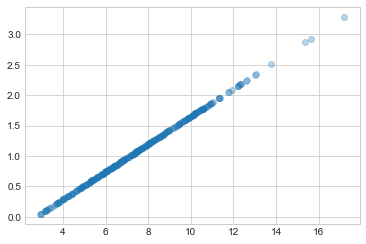

In [32]:
#Plot Return vs Risk
plt.plot(df_value['Risk_Free_Return'], df_value['Beta'], 'o', alpha = 0.3)
plt.show()

In [33]:
# High risk high return

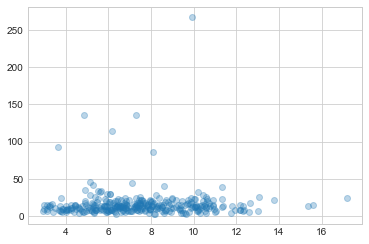

In [34]:
# Plot Return vs Volatility
plt.plot(df_value['Risk_Free_Return'], df_value['Stock_Volatility'], 'o', alpha = 0.3)
plt.show()

In [35]:
# Can have high return with low volatility

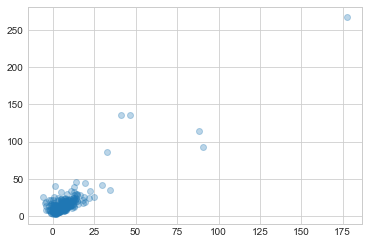

In [36]:
plt.plot(df_value['Expected_Annual_Return'], df_value['Stock_Volatility'], 'o', alpha = 0.3)
plt.show()